# KOUSALYA DEEPAK

## TASK - 2 Prediction using Unsupervised ML

### OBJECTIVE

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually and use Python to perform this task.

#### Importing libraries

In [8]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

#### Reading the data

In [9]:
df = pd.read_csv("Iris.csv")

#### Performing EDA 

In [10]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Id column is not a real feature of our flowers. Hence, dropping it.

In [11]:
df.drop(["Id"],axis=1,inplace=True)    # dropped

df.tail()   # last 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Plotting the pairplot

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

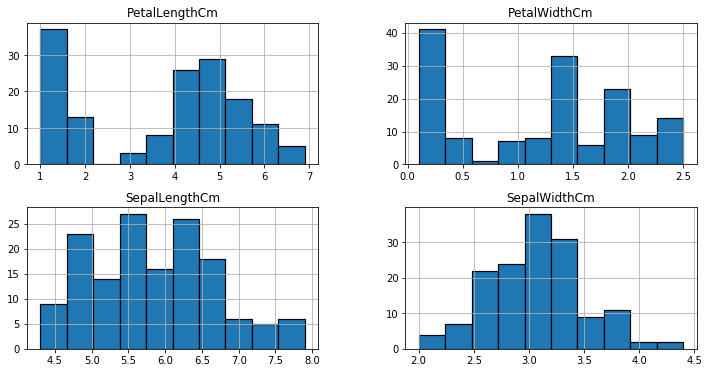

In [14]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

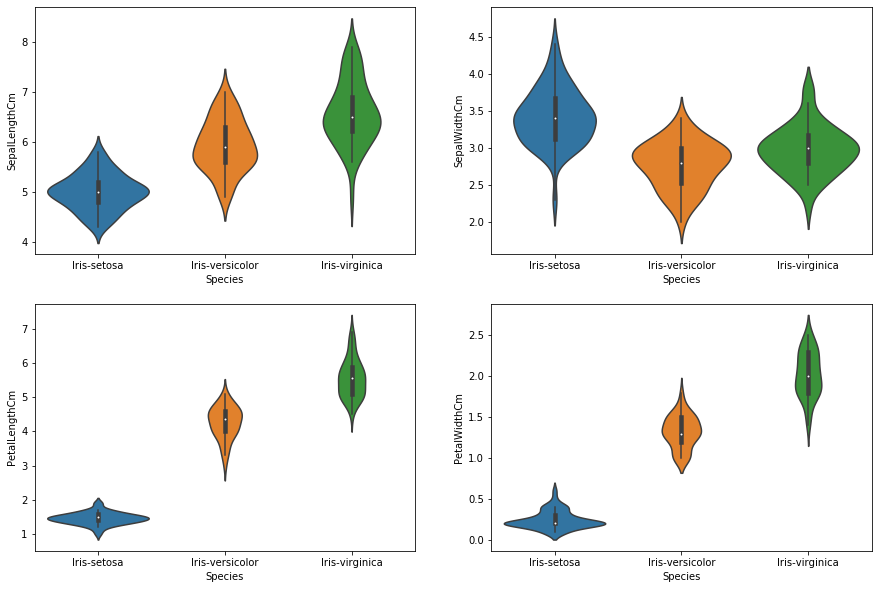

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df)

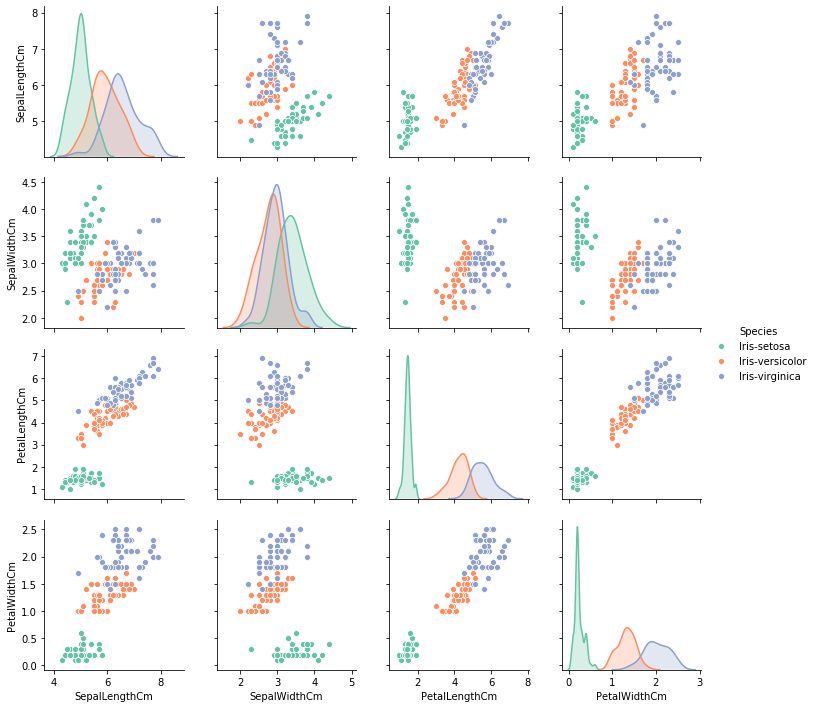

In [15]:
sns.pairplot(data=df,hue="Species",palette="Set2")
plt.show()

#### We see that iris-setosa is easily separable from the other two. Especially when we can see in different colors for corresponding Labels like above.

### Adjusting the Dataset for Unsupervised Learning

In [56]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

### Implemeting the K Means Clustering 

In [57]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)

In [58]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

#### Plotting the graph

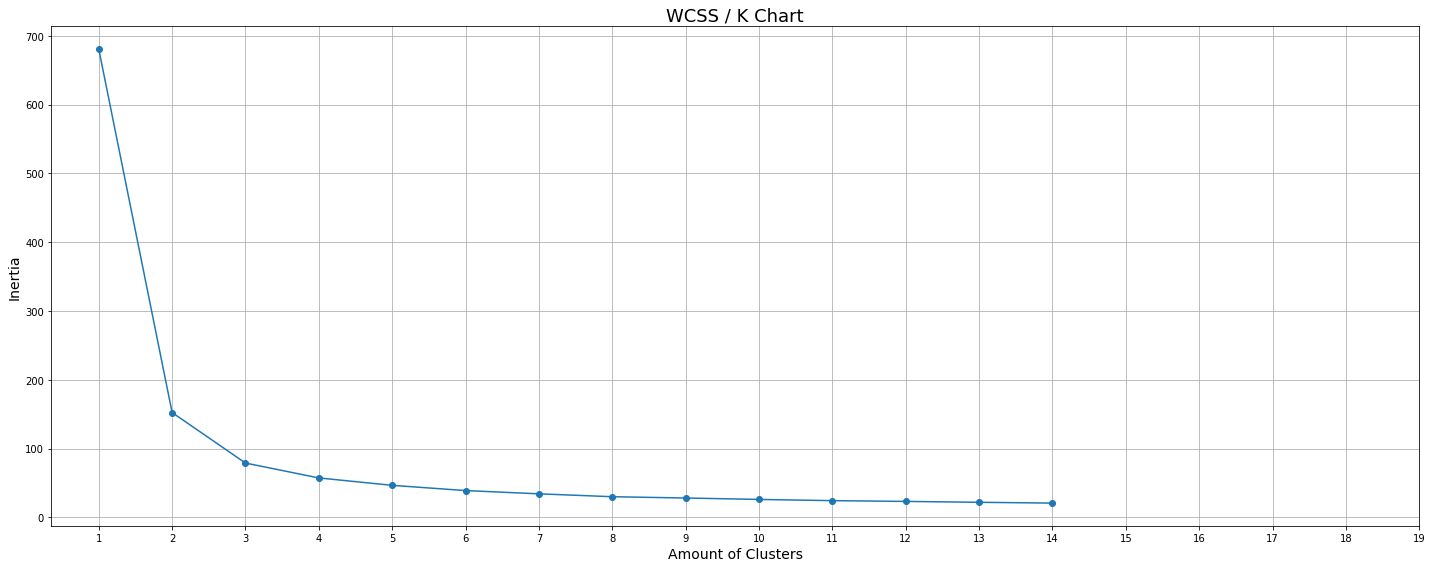

In [59]:
plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

#### 3 or 2 seems to be our Best value(s) for clusters. (By the Elbow Rule)

#### Plotting the graph

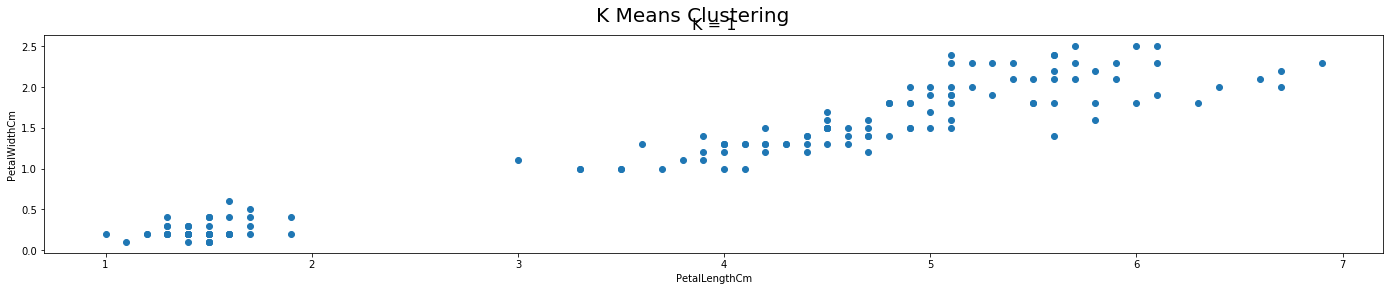

In [60]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)

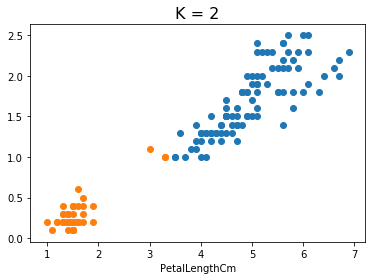

In [61]:
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])



In [62]:
#drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

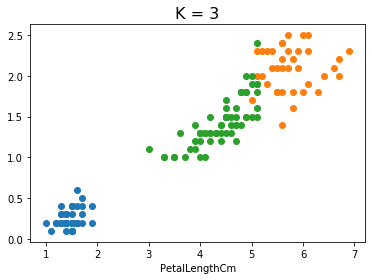

In [63]:
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])


In [64]:
#drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

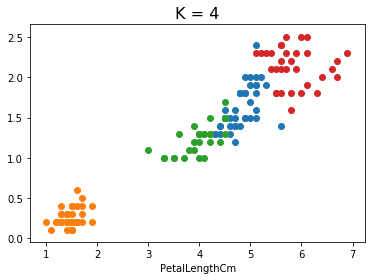

In [65]:
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])


In [66]:
# drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

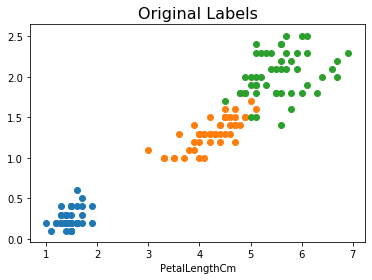

In [67]:
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])


#### Kmeans visibly did an amazing job with 3 clusters. Except few data points, I can say prediction is identical to the original with labels which shows that our ELBOW chart was right.

### THANKYOU